In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..//')

c:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\notebooks
c:
Users
sceac10
c:\sceac10\


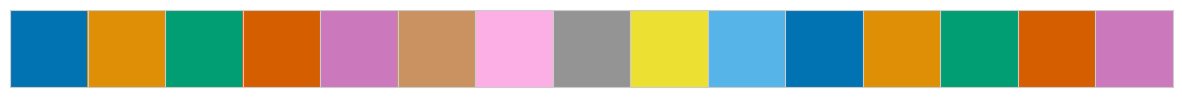

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
import sys
from matplotlib.ticker import MaxNLocator
import random
from typing import List
from dataclasses import dataclass
import src.dwellings_characteristics.thermal_characteristics as th
from src.flexibility import enums
from src.visualization import visualize
random.seed(42)

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
export_fig_format = "pdf"
fig_format = "png"
dpi = 300
figsize = (12, 3.5)
figsize_map = (16, 8)
sns.palplot(sns.color_palette())

markers = ['P', 'o', '^', 's', '*', 'v']
linewidth = 0.1
edgecolor = 'black'

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)


data_org_path = r"D:\OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data\Domestic_EPC_results\EPC_thermal_capacity" #computer_path


In [4]:
@dataclass
class DataSchema:
    INDEX = "Index"
    DURATION = "Duration_(s)"
    THERMALCAP = "Thermal_Capacity_Level"
    LA = "Local_Authority"
    FLEXIBILITY = "Flexibility_(kW)"
    OAT = "Outside_Air_Temperature_(degreeC)"
    IAT = "Inside_Air_Temperature_(degreeC)"
    RESULTS = "Results"

In [5]:
from pathlib import Path

In [6]:
ukerc_save_data = Path(r'C:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\data\UKERC')

In [7]:
# load LSOA data
lsoa_beforeEE_dataf = pd.read_csv(data_org_path+os.path.sep+'Thermal_characteristics_beforeEE_LSOA_EandW.csv', index_col=0) 
lsoa_beforeEE_dataf.reset_index(inplace=True)


In [8]:
lsoa_beforeEE_dataf

,index,LSOA11CD,N_Households 2011,Rurality,MSOA11CD,LAD11CD,Local Authority,Detached No central heating 2011,Number of detached gas boiler in 2011,Number of detached resistance heating in 2011,...,Total thermal losses semi-detached oil boiler kW/K,Total thermal losses semi-detached biomass boiler kW/K,Total thermal losses terraced gas boiler kW/K,Total thermal losses terraced resistance heating kW/K,Total thermal losses terraced oil boiler kW/K,Total thermal losses terraced biomass boiler kW/K,Total thermal losses flat gas boiler kW/K,Total thermal losses flat resistance heating kW/K,Total thermal losses flat biomass boiler kW/K,Total thermal losses kW/K
0,0,E01000001,876,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,0.0,0.0,...,0.00000,0.000000,0.695063,0.944184,0.0,0.000000,14.510947,40.505062,0.000000,61.097372
1,1,E01000002,830,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,0.0,0.0,...,0.00000,0.000000,2.780252,3.021390,0.0,0.000000,8.650162,68.954474,0.000000,86.235241
2,2,E01000003,817,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,0.0,0.0,...,0.00000,0.000000,2.085189,0.000000,0.0,0.000000,138.460134,20.890457,0.000000,161.739732
3,3,E01000005,467,Rurality_Urban >10K,E02000001,E09000001,City of London,0.0,1.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,38.144816,9.456513,0.000000,57.242769
4,4,E01000006,543,Rurality_Urban >10K,E02000017,E09000002,Barking and Dagenham,2.0,26.0,1.0,...,0.00000,0.000000,96.720388,1.191141,0.0,0.176764,4.703048,4.495307,0.000000,164.995869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34748,34748,W01001954,637,Rurality_Urban >10K,W02000372,W06000015,Cardiff,0.0,274.0,0.0,...,0.00000,0.000000,19.769570,0.101292,0.0,0.000000,16.741162,3.848662,0.000000,283.177333
34749,34749,W01001955,1153,Rurality_Urban >10K,W02000192,W06000011,Swansea,0.0,10.0,6.0,...,0.35654,0.000000,15.109326,0.772859,0.0,0.000000,117.480028,22.969679,0.000000,169.341791
34750,34750,W01001956,803,Rurality_Urban >10K,W02000190,W06000011,Swansea,1.0,259.0,3.0,...,0.35654,0.257147,16.653085,1.505075,0.0,0.000000,12.958814,1.368504,0.124136,233.417241
34751,34751,W01001957,411,Rurality_Urban >10K,W02000192,W06000011,Swansea,0.0,3.0,1.0,...,0.00000,0.000000,71.904260,1.352503,0.0,0.267100,24.203441,3.824637,0.000000,110.435287


In [9]:
# load LSOA data
lsoa_afterEE_dataf = pd.read_csv(data_org_path+os.path.sep+'Thermal_characteristics_afterEE_LSOA_EandW.csv', index_col=0) 
# lsoa_afterEE_data.reset_index(inplace=True)

## Thermal characteristics of dwellings

In [24]:
## Creation of a tidy dataframe of the original lsoa dataframe
def get_thermal_characteristics_data(lsoa_dataf:pd.DataFrame, before_EE:bool|None=True)->pd.DataFrame:
    if before_EE:
        target_EE = "before"
    else:
        target_EE = "after"
    categories = [
                "flat oil boiler",
                "detached gas boiler",
                "detached resistance heating",
                "detached oil boiler",
                "detached biomass boiler",
                "semi-detached gas boiler",
                "semi-detached resistance heating",
                "semi-detached oil boiler",
                "semi-detached biomass boiler",
                "terraced gas boiler",
                "terraced resistance heating",
                "terraced oil boiler",
                "terraced biomass boiler",
                "flat gas boiler",
                "flat resistance heating",
                "flat biomass boiler",
            ]

    thermal_capacity_levels = ["medium"]#["low", "medium", "high"]

    cols_without_hp = [c for c in lsoa_dataf.columns if "heat pump" not in c]
    tidy_df = th.get_concat_tidy_df(lsoa_dataf[cols_without_hp], categories, thermal_capacity_levels, target_EE)
    tidy_df = th.add_columns_tidy_df(lsoa_dataf, tidy_df)
    # tidy_df.head()

    cols_to_keep = ['LSOA_code', 'Local Authority', 'Region','Dwelling forms', 'Heating systems','Average thermal capacity kJ/K',
        'Average thermal losses kW/K', 'Number of dwellings',
        'Average annual heat demand kWh', 'Average floor area m2',
        'Thermal capacity level',  "Outdoor air design temperature degreeC",
        ]

    tidy_df = tidy_df[cols_to_keep].reset_index(drop=True)
    tidy_df.index.name = "Index"
    return tidy_df

In [25]:
before_EE_tidy_df = get_thermal_characteristics_data(lsoa_beforeEE_dataf, before_EE=True)
before_EE_tidy_df

,LSOA_index,Dwelling category,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Total annual heat demand kWh,Dwelling forms,Heating systems,Outdoor air design temperature degreeC,Region,Local Authority,LSOA_code,Average size of heating system kW,Total capacity installed of heating systems GW
0,0,flat oil boiler,19402.494310,0.303952,12.0,12937.408384,77.609977,medium,1.552489e+05,flat,oil boiler,-2.0,London,City of London,E01000001,6.990894,0.000084
5,0,semi-detached gas boiler,24404.366968,0.397347,2.0,16912.665792,97.617468,medium,3.382533e+04,semi-detached,gas boiler,-2.0,London,City of London,E01000001,9.138975,0.000018
9,0,terraced gas boiler,43970.121344,0.695063,1.0,29584.664638,175.880485,medium,2.958466e+04,terraced,gas boiler,-2.0,London,City of London,E01000001,15.986451,0.000016
10,0,terraced resistance heating,16315.000000,0.094418,10.0,4018.826439,65.260000,medium,4.018826e+04,terraced,resistance heating,-2.0,London,City of London,E01000001,2.171624,0.000022
13,0,flat gas boiler,14463.409091,0.152747,95.0,6501.515152,57.853636,medium,6.176439e+05,flat,gas boiler,-2.0,London,City of London,E01000001,3.513177,0.000334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556041,34752,terraced gas boiler,25430.863801,0.373869,107.0,18474.199623,101.723455,medium,1.976739e+06,terraced,gas boiler,-3.0,Wales,Swansea,W01001958,8.972849,0.000960
556042,34752,terraced resistance heating,22184.166667,0.193215,2.0,9547.432550,88.736667,medium,1.909487e+04,terraced,resistance heating,-3.0,Wales,Swansea,W01001958,4.637152,0.000009
556045,34752,flat gas boiler,13255.612500,0.160746,370.0,7943.055556,53.022450,medium,2.938931e+06,flat,gas boiler,-3.0,Wales,Swansea,W01001958,3.857912,0.001427
556046,34752,flat resistance heating,16311.766518,0.046321,411.0,2288.908057,65.247066,medium,9.407412e+05,flat,resistance heating,-3.0,Wales,Swansea,W01001958,1.111714,0.000457


In [15]:
before_EE_tidy_df.head(1000).to_csv(ukerc_save_data/f"Sample_Thermal_characteristics_beforeEE.csv")
before_EE_tidy_df.to_csv(ukerc_save_data/f"Thermal_characteristics_beforeEE.csv")

In [16]:
after_EE_tidy_df = get_thermal_characteristics_data(lsoa_afterEE_dataf, before_EE=False)
after_EE_tidy_df.to_csv(ukerc_save_data/f"Thermal_characteristics_afterEE.csv")
after_EE_tidy_df

,LSOA_code,Local Authority,Region,Dwelling forms,Heating systems,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Outdoor air design temperature degreeC
Index,,,,,,,,,,,,
0,E01000001,City of London,London,flat,oil boiler,7743.573923,0.190661,12.0,8115.289346,77.435739,low,-2.0
1,E01000001,City of London,London,semi-detached,gas boiler,9757.884426,0.262593,2.0,11176.994057,97.578844,low,-2.0
2,E01000001,City of London,London,terraced,gas boiler,17584.164375,0.436325,1.0,18571.754902,175.841644,low,-2.0
3,E01000001,City of London,London,terraced,resistance heating,6526.000000,0.062456,10.0,2658.375704,65.260000,low,-2.0
4,E01000001,City of London,London,flat,gas boiler,5785.363636,0.114664,95.0,4880.555556,57.853636,low,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1036984,W01001958,Swansea,Wales,terraced,gas boiler,45775.554843,0.220491,107.0,10895.244821,101.723455,high,-3.0
1036985,W01001958,Swansea,Wales,terraced,resistance heating,39931.500000,0.086293,2.0,4264.033943,88.736667,high,-3.0
1036986,W01001958,Swansea,Wales,flat,gas boiler,23860.102500,0.115907,370.0,5727.361111,53.022450,high,-3.0


# Results for England and Wales

In [ ]:
def create_tidy_dataframe(input_dataf:pd.DataFrame, time_interval:int, scenario_OAT:int, scenario_IAT:int, thermal_capacity_level:str) -> pd.DataFrame:
    """Rearange the input dataframe to be exported."""
    # last_index_to_keep:int = 0
    # for LA in input_dataf.columns:
    #     print(f"{LA}")
    #     temp_index:int = time_interval
    #     if input_dataf[LA].last_valid_index():
    #         temp_series = ((input_dataf[LA].shift().fillna(method="bfill")-input_dataf[LA])/time_interval)
    #         temp_index:int = temp_series.where(np.abs(temp_series.values)>0).last_valid_index()
        
        
    #     if temp_index>last_index_to_keep:
    #         last_index_to_keep = temp_index
        

    # reduced_df = input_dataf.loc[:last_index_to_keep].copy()
    reduced_df = input_dataf.copy()
    reduced_df.fillna(0, inplace=True)
    # reduced_df = reduced_df.stack().reset_index()
    # reduced_df.columns = [DataSchema.DURATION, DataSchema.LA, DataSchema.FLEXIBILITY]
    reduced_df = pd.concat({(scenario_OAT, scenario_IAT, thermal_capacity_level):reduced_df}, axis=1)
    reduced_df.columns.names = [DataSchema.OAT,DataSchema.IAT, DataSchema.THERMALCAP,DataSchema.LA]
    reduced_df.index.name = DataSchema.DURATION
    return reduced_df

: 

: 

: 

In [ ]:
def export_data(**params):
    time_interval = 5*60 #5min or 300sec
    max_index = 24*60*60 #export flexibility results for 24 hours
    OAT = params["OAT"]
    IAT = params["IAT"]
    thermal_capacity_level = params["Thermal_capacity_level"]
    capacity_factor = params["Capacity_factor"]
    after_EE = params["After_EE"]
    use_pdf = False
    capacity_factor_to_str = {0:"Negative", 1:"Positive"}
    EE_level_to_str = {True: "After_EE", False: "Before_EE"}
    results_df = visualize.get_results_data(scenario=enums.Scenario.HP100, 
                use_pdf=use_pdf, 
                mean_indoor_temperature=IAT, 
                after_EE=after_EE, 
                thermal_capacity_level=thermal_capacity_level,
                outside_air_temperature=OAT,
                capacity_factor=capacity_factor)
    resampled_df = results_df[results_df.index%(time_interval)==0].copy()
    export_df = create_tidy_dataframe(resampled_df, time_interval, OAT, IAT, thermal_capacity_level)
    export_df = export_df.loc[:max_index].T/1000
    export_df.to_csv(ukerc_save_data/f"{capacity_factor_to_str[capacity_factor]}_Flexibility_Results_LA_{EE_level_to_str[after_EE]}_{OAT}_{IAT}_{thermal_capacity_level}.csv")
    return export_df

: 

: 

: 

In [ ]:
## Export data of basic scenario (IAT = 19C and 20C)
capacity_factor_to_str = {0:"Negative", 1:"Positive"}
scenario = enums.Scenario.HP100
use_pdf = False
list_IATs = [19, 20]
after_EE = False
thermal_capacity_level = "medium"
list_OATs = [-5, 0, 5, 10]
list_capacity_factors = [0, 1]

for IAT in list_IATs:
    for OAT in list_OATs:
        for capacity_factor in list_capacity_factors:
            export_df = export_data(OAT = OAT, IAT = IAT, Thermal_capacity_level = thermal_capacity_level, After_EE = after_EE, Capacity_factor = capacity_factor)

export_df.iloc[:1500].to_csv(ukerc_save_data/f"Sample_{capacity_factor_to_str[capacity_factor]}_Flexibility_Results_LA_{EE_level_to_str[after_EE]}_{OAT}_{IAT}.csv")

Looking for results files in: None
Opening: c:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\data\results_modelling_EW\before_energy_efficiency\OAT_-5_mean_temp_19_thermal_capacity_medium\Results_slice_0_cf_0_sc_HP100.csv
Opening: c:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\data\results_modelling_EW\before_energy_efficiency\OAT_-5_mean_temp_19_thermal_capacity_medium\Results_slice_1_cf_0_sc_HP100.csv
Opening: c:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\data\results_modelling_EW\before_energy_efficiency\OAT_-5_mean_temp_19_thermal_capacity_medium\Results_slice_2_cf_0_sc_HP100.csv
Opening: c:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\data\results_modelling_EW\before_energy_efficiency\OAT_-5_mean_temp_19_thermal_capacity_medium\Results_slice_3_cf_0_sc_HP100.csv
O

NameError: name 'capacity_factor_to_str' is not defined

: 

: 

: 

In [ ]:
## Export data of scenario after energy efficiency measures (IAT = 19C and 20C)

scenario = enums.Scenario.HP100
use_pdf = False
list_IATs = [19]
after_EE = True
list_thermal_capacity_levels = ["medium", "medium+10%", "medium-10%"]
list_OATs = [-5, 0, 5, 10]
list_capacity_factors = [0, 1]

for IAT in list_IATs:
    for OAT in list_OATs:
        for capacity_factor in list_capacity_factors:
            for thermal_capacity_level in list_thermal_capacity_levels:
                export_df = export_data(OAT = OAT, IAT = IAT, Thermal_capacity_level = thermal_capacity_level, After_EE = after_EE, Capacity_factor = capacity_factor)



Looking for results files in: None
Opening: c:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\data\results_modelling_EW\after_energy_efficiency\OAT_-5_mean_temp_19_thermal_capacity_medium\Results_slice_0_cf_0_sc_HP100.csv
Opening: c:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\data\results_modelling_EW\after_energy_efficiency\OAT_-5_mean_temp_19_thermal_capacity_medium\Results_slice_1_cf_0_sc_HP100.csv
Opening: c:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\data\results_modelling_EW\after_energy_efficiency\OAT_-5_mean_temp_19_thermal_capacity_medium\Results_slice_2_cf_0_sc_HP100.csv
Opening: c:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\data\results_modelling_EW\after_energy_efficiency\OAT_-5_mean_temp_19_thermal_capacity_medium\Results_slice_3_cf_0_sc_HP100.csv
Openi

: 

: 

: 

In [ ]:
export_df

Duration_(s)                                                                                                  0.0      \
Outside_Air_Temperature_(degreeC) Inside_Air_Temperature_(degreeC) Thermal_Capacity_Level Local_Authority               
10                                19                               medium-10%             Adur              27.293296   
                                                                                          Allerdale         60.374112   
                                                                                          Amber Valley      66.255125   
                                                                                          Arun              75.894209   
                                                                                          Ashfield          62.534780   
...                                                                                                               ...   
                                                                                          Wychavon          67.295601   
                                                                                          Wycombe           82.029889   
                                                                                          Wyre              60.738327   
                                                                                          Wyre Forest       50.095341   
                                                                                          York             104.369576   

Duration_(s)                                                                                                  300.0    \
Outside_Air_Temperature_(degreeC) Inside_Air_Temperature_(degreeC) Thermal_Capacity_Level Local_Authority               
10                                19                               medium-10%             Adur              27.286174   
                                                                                          Allerdale         60.365706   
                                                                                          Amber Valley      66.246880   
                                                                                          Arun              75.888200   
                                                                                          Ashfield          62.518715   
...                                                                                                               ...   
                                                                                          Wychavon          67.282942   
                                                                                          Wycombe           82.013345   
                                                                                          Wyre              60.693280   
                                                                                          Wyre Forest       50.060254   
                                                                                          York             104.340951   

Duration_(s)                                                                                                  600.0    \
Outside_Air_Temperature_(degreeC) Inside_Air_Temperature_(degreeC) Thermal_Capacity_Level Local_Authority               
10                                19                               medium-10%             Adur              27.286174   
                                                                                          Allerdale         60.365706   
                                                                                          Amber Valley      66.246880   
                                                                                          Arun              75.888200   
                                                                                          Ashfield          62.518715   
...  

: 

: 

: 